# 3. Model Benchmarks

* [3.1 Feature Selection](#3.1-Model-Preparation)
    * [3.1.1 Scaling](#3.1.1-Scaling)
    * [3.1.2 Instantiate Models](#3.1.2-Instantiate-Models)
    * [3.1.3 Cross Validation](#3.1.3-Cross-Validation)    
    * [2.1.4 Saving Final Dataset](#2.1.4-Saving-Final-Dataset)
    
* [3.2 Models Fitting and Evaluation](#3.2-Models-Fitting-and-Evaluation)
    * [3.2.1 Linear Regression](#3.2.1-Linear-Regression)
    * [3.2.2 Lasso Regression](#3.2.2-Lasso-Regression)
    * [3.2.3 Ridge Regression](#3.2.3-Ridge-Regression)    

* [3.3 Optimising Alpha](#3.3-Optimising-Alpha)
    * [3.3.1 Lasso Regression](#3.3.1-Lasso-Regression)
    * [3.3.2 Ridge Regression](#3.3.2-Ridge-Regression)    
    * [3.3.3 Elastic Net](#3.3.3-Elastic-Net)

* [3.4 Conclusion](#3.4-Conclusion)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn import metrics
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('../datasets/train_clean2.csv') 

In [3]:
features = [col for col in train._get_numeric_data().columns[2:] if col != 'SalePrice']
X = train[features]
y = train['SalePrice']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## 3.1 Model Preparation

### 3.1.1 Scaling

In [5]:
ss = StandardScaler()
ss.fit(X_train)
X_train_s = ss.transform(X_train)
X_test = ss.transform(X_test)

### 3.1.2 Instantiate Models

In [6]:
lr = LinearRegression()
lasso = LassoCV(alphas=[0.01,10,100])
ridge = RidgeCV(alphas=np.linspace(1, 1000, 10))

### 3.1.3 Cross Validation

In [7]:
lr_scores = cross_val_score(lr, X_train_s, y_train, cv=10)
lr_scores.mean()

0.9106406379701889

In [8]:
lasso_scores = cross_val_score(lasso, X_train_s, y_train, cv=10)
lasso_scores.mean()

0.9106706987526941

In [9]:
ridge_scores = cross_val_score(ridge, X_train_s, y_train, cv=10)
ridge_scores.mean()

0.9106619631523021

All 3 results from cross validation are quite close with lasso performing slightly better.

## 3.2 Models Fitting and Evaluation

### 3.2.1 Linear Regression

In [10]:
lr.fit(X_train_s, y_train)

LinearRegression()

In [11]:
print(lr.score(X_train_s, y_train))
print(lr.score(X_test, y_test))

0.9220631816484637
0.9234719374036359


In [12]:
lr_scores.mean()

0.9106406379701889

In [13]:
lr_pred = lr.predict(X_test)

In [14]:
r2_score(y_test, lr_pred)

0.9234719374036359

### 3.2.2 Lasso Regression

In [15]:
lasso.fit(X_train_s, y_train)

LassoCV(alphas=[0.01, 10, 100])

In [16]:
print(lasso.score(X_train_s, y_train))
print(lasso.score(X_test, y_test))

0.9220617254394374
0.9234637999804518


In [17]:
lasso_scores.mean()

0.9106706987526941

In [18]:
lasso.alpha_

10.0

In [19]:
print ('Percent variables zeroed out:', np.sum((lasso.coef_ == 0))/float(X.shape[0]))

Percent variables zeroed out: 0.0


In [20]:
lasso_pred = lasso.predict(X_test)

In [21]:
r2_score(y_test, lasso_pred)

0.9234637999804518

### 3.2.3 Ridge Regression

In [22]:
ridge.fit(X_train_s, y_train)

RidgeCV(alphas=array([   1.,  112.,  223.,  334.,  445.,  556.,  667.,  778.,  889.,
       1000.]))

In [23]:
print(ridge.score(X_train_s, y_train))
print(ridge.score(X_test, y_test))

0.922062836278796
0.9235084835835983


In [24]:
ridge_scores.mean()

0.9106619631523021

In [25]:
ridge.alpha_

1.0

In [26]:
ridge_pred = ridge.predict(X_test)

In [27]:
r2_score(y_test, ridge_pred)

0.9235084835835983

<AxesSubplot:>

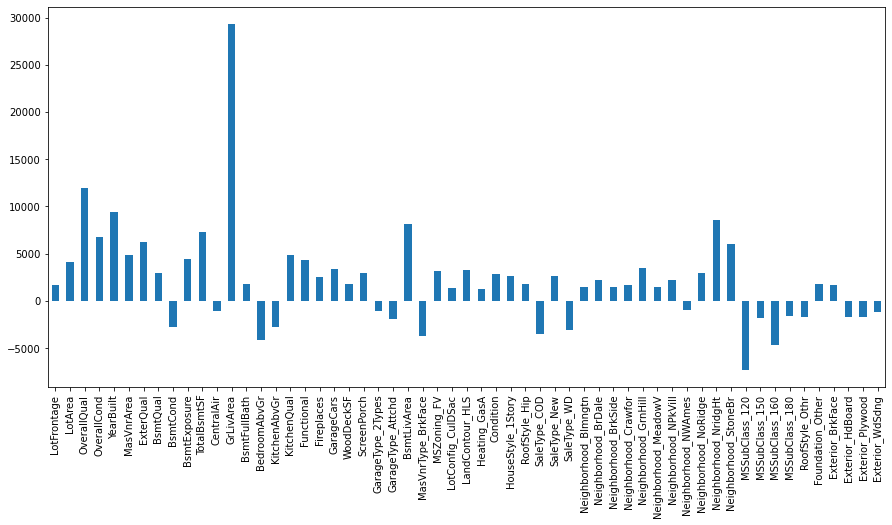

In [28]:
pd.Series(ridge.coef_, index=features).plot.bar(figsize=(15, 7))

In [29]:
ridge_residuals = y_test - ridge_pred

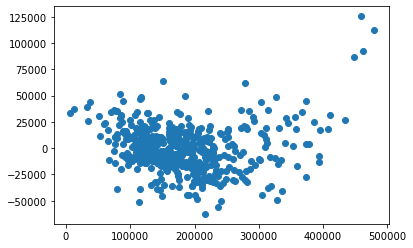

In [30]:
plt.scatter(ridge_pred, ridge_residuals)

In [31]:
print(" Linear ".center(18, "="))
print(lr.score(X_train_s, y_train))
print(lr.score(X_test, y_test))
print()
print(" Lasso ".center(18, "="))
print(lr.score(X_train_s, y_train))
print(lr.score(X_test, y_test))
print()
print(" Ridge ".center(18, "="))
print(ridge.score(X_train_s, y_train))
print(ridge.score(X_test, y_test))

===== Linear =====
0.9220631816484637
0.9234719374036359

===== Lasso ======
0.9220631816484637
0.9234719374036359

===== Ridge ======
0.922062836278796
0.9235084835835983


After fitting into the respective models, we can see that Ridge test score did slightly better.

## 3.3 Optimising Alpha

### 3.3.1 Lasso Regression

In [32]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X_train_s, y_train)

print (optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

63.51562302351785


...................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.4s finished


In [33]:
lasso2 = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores2 = cross_val_score(lasso2, X_train_s, y_train, cv=10)

print (lasso_scores2)
print (np.mean(lasso_scores2))

[0.89113211 0.90638195 0.91683126 0.9300571  0.88820376 0.9148516
 0.90901206 0.89710836 0.91128374 0.94113919]
0.9106001121047822


In [34]:
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

,variable,coef,abs_coef
12,GrLivArea,29366.061729,29366.061729
2,OverallQual,11977.018214,11977.018214
4,YearBuilt,9374.581082,9374.581082
45,Neighborhood_NridgHt,8518.687106,8518.687106
24,BsmtLivArea,8185.767171,8185.767171
47,MSSubClass_120,-7281.333939,7281.333939
10,TotalBsmtSF,7247.146457,7247.146457
3,OverallCond,6739.261115,6739.261115
6,ExterQual,6261.774550,6261.774550
46,Neighborhood_StoneBr,5990.428393,5990.428393


In [35]:
print(" Lasso before".center(18, "="))
print(lasso_scores.mean())
print(" Lasso after".center(18, "="))
print (np.mean(lasso_scores2))

== Lasso before===
0.9106706987526941
=== Lasso after===
0.9106001121047822


### 3.3.2 Ridge Regression

In [36]:
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train_s, y_train)

print (optimal_ridge.alpha_)

27.049597304631355


In [37]:
ridge2 = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores2 = cross_val_score(ridge2, X_train_s, y_train, cv=10)

print (ridge_scores2)
print (np.mean(ridge_scores2))

[0.89399244 0.90582881 0.91802811 0.92880939 0.89156645 0.91340608
 0.90955537 0.89611859 0.9110453  0.94065762]
0.910900816110563


In [38]:
print(" Ridge before".center(18, "="))
print(ridge_scores.mean())
print(" Ridge after".center(18, "="))
print (np.mean(ridge_scores2))

== Ridge before===
0.9106619631523021
=== Ridge after===
0.910900816110563


### 3.3.3 Elastic Net

In [39]:
l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10,
                            verbose=1)
optimal_enet.fit(X_train_s, y_train)

print (optimal_enet.alpha_)
print (optimal_enet.l1_ratio_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

63.51562302351785
1.0


....................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    6.3s finished


In [40]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, X_train_s, y_train, cv=10)

print (enet_scores)
print (np.mean(enet_scores))

[0.89113211 0.90638195 0.91683126 0.9300571  0.88820376 0.9148516
 0.90901206 0.89710836 0.91128374 0.94113919]
0.9106001121047822


In [41]:
ridge2.fit(X_train_s, y_train)
lasso2.fit(X_train_s, y_train)

Lasso(alpha=63.51562302351785)

In [42]:
ridge_resid = y_train - ridge2.predict(X_train_s)
lasso_resid = y_train - lasso2.predict(X_train_s)

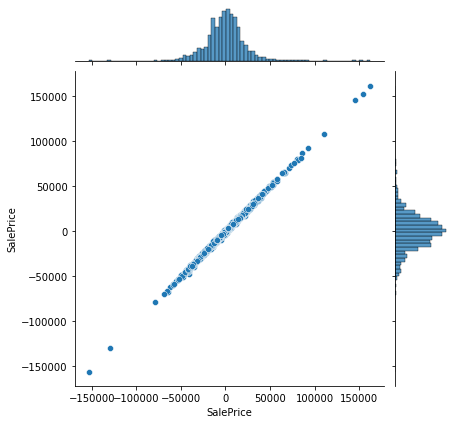

In [43]:
sns.jointplot(ridge_resid, lasso_resid)

## 3.4 Conclusion
Based on the model evaluation, we can determine that Ridge is model that we will use for prediction.

Text(0.5, 1.0, 'Ridge Predictions of Sale Price vs Actual Sale Price')

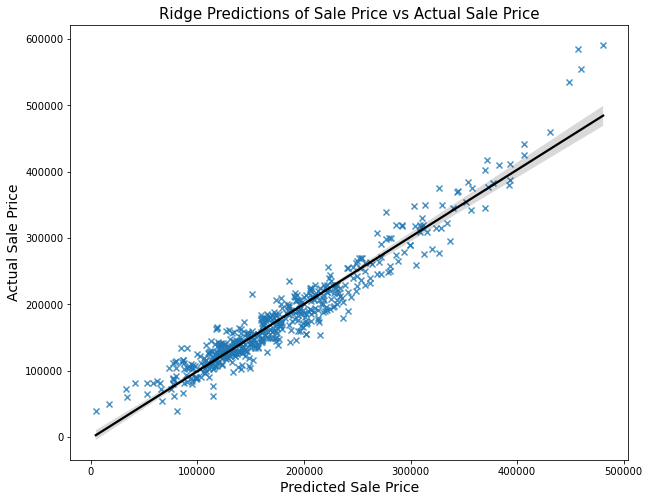

In [44]:
ridge_preds = ridge2.predict(X_test)

plt.figure(figsize=(10,8))
sns.regplot(data=X_train_s, x=ridge_preds, y=y_test, marker='x', line_kws={'color':'black'})
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Ridge Predictions of Sale Price vs Actual Sale Price', fontsize=15)

Notice that the best fit line pass through most of the points except for a few outlier, that are of more expensive price.

Text(0.5, 1.0, 'Residuals')

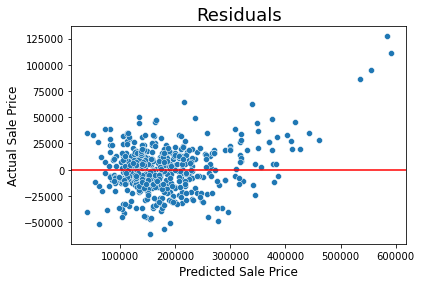

In [45]:
ax = sns.scatterplot(data=train, x=y_test, y=y_test-ridge_preds)
ax.axhline(y=0, c='red')
plt.xlabel('Predicted Sale Price', fontsize=12)
plt.ylabel('Actual Sale Price', fontsize=12)
plt.title('Residuals', fontsize=18)

#### Top 20 Coefficient and bottom 10 Coefficient

In [46]:
ridge_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':ridge2.coef_,
                            'abs_coef':np.abs(ridge2.coef_)})

ridge_coefs.sort_values('coef', inplace=True, ascending=False)

ridge_coefs.head(20)

,variable,coef,abs_coef
12,GrLivArea,27366.120619,27366.120619
2,OverallQual,11976.649996,11976.649996
4,YearBuilt,8549.112980,8549.112980
45,Neighborhood_NridgHt,8242.509729,8242.509729
24,BsmtLivArea,8045.530091,8045.530091
10,TotalBsmtSF,7651.534862,7651.534862
6,ExterQual,6519.907073,6519.907073
3,OverallCond,6421.883374,6421.883374
46,Neighborhood_StoneBr,5920.283338,5920.283338
16,KitchenQual,5243.340334,5243.340334


In [47]:
ridge_coefs.sort_values('coef', inplace=True, ascending=True)

ridge_coefs.head(10)

,variable,coef,abs_coef
47,MSSubClass_120,-6735.277092,6735.277092
49,MSSubClass_160,-4147.104147,4147.104147
25,MasVnrType_BrkFace,-3606.637346,3606.637346
14,BedroomAbvGr,-3360.376580,3360.376580
33,SaleType_COD,-3342.850812,3342.850812
35,SaleType_WD,-2860.737321,2860.737321
8,BsmtCond,-2784.738520,2784.738520
15,KitchenAbvGr,-2580.763355,2580.763355
54,Exterior_HdBoard,-1760.727968,1760.727968
23,GarageType_Attchd,-1718.178176,1718.178176


the model produced 57 non-zero coefficients.


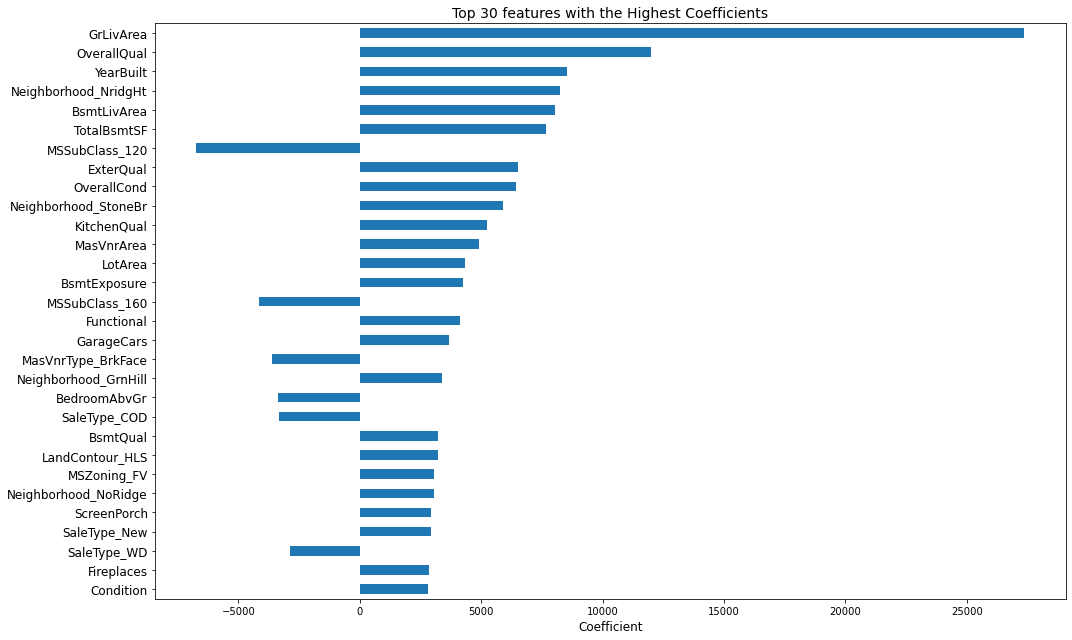

In [48]:
ridge_coefs2 = pd.DataFrame(ridge2.coef_, index = features)              # get coefficients from best model
ridge_coefs2 = ridge_coefs2[ridge_coefs2[0] != 0]                                   # get non-zero coefficients
print(f'the model produced {ridge_coefs2.shape[0]} non-zero coefficients.')

# sort by absolute values
ridge_coefs2 = ridge_coefs2.reindex(ridge_coefs2[0].abs().sort_values(ascending=True).index)

# plot top 30 coefficients
ridge_coefs2.tail(30).plot.barh(figsize=(15,9), legend = None)
plt.title('Top 30 features with the Highest Coefficients',fontsize=14)
plt.xlabel('Coefficient', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

Top features for prediction are GrLivArea, OverallQual and YearBuilt which seem to be reasonable for affecting SalePrice. Certain Neigborhood seem to affect SalePrice, which might be those more desirable areas. Bsmt, Garage can also play a part in increasing SalePrice. 

## 3.5 Submission


### 3.5.1 Ridge

In [49]:
test = pd.read_csv('../datasets/test_clean2.csv') 

In [50]:
test2 = test.iloc[:,2:]

In [51]:
X_final = ss.fit_transform(X)
ridge2.fit(X_final, y)
ridge2.score(X_final,y)

0.9232857163157989

In [52]:
test_final = ss.transform(test2)

In [53]:
test_r = test

In [54]:
ridge_predict = ridge2.predict(test_final)
test_r['SalePrice'] = ridge_predict

In [55]:
test_r[['Id','SalePrice']]

,Id,SalePrice
0,2658,155306.341731
1,2718,153314.768755
2,2414,222720.171592
3,1989,111304.412700
4,625,176865.691509
...,...,...
873,1662,190358.596084
874,1234,223625.095667
875,1373,119675.939052
876,1672,104734.631660


In [56]:
submission_ridge = test_r[['Id','SalePrice']]
submission_ridge.to_csv('../datasets/submission_ridge.csv', index=False)

### 3.5.1 Lasso

In [57]:
lasso2.fit(X_final, y)
lasso2.score(X_final,y)

0.9233391509219225

In [58]:
test_l = test

In [59]:
lasso_predict = lasso2.predict(test_final)
test_l['SalePrice'] = lasso_predict

In [60]:
test_l[['Id','SalePrice']]

,Id,SalePrice
0,2658,154882.310106
1,2718,152704.360653
2,2414,222685.905456
3,1989,111018.119112
4,625,176057.898504
...,...,...
873,1662,191051.900765
874,1234,223578.677734
875,1373,120609.102239
876,1672,104760.802714


In [61]:
submission_lasso = test[['Id','SalePrice']]
submission_lasso.to_csv('../datasets/submission_lasso.csv', index=False)